Uyen Huynh

# Crash Data from Town of Cary, North Carolina

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

In [2]:
original_data = pd.read_csv("cpd-crash-incidents.csv", sep=";")

In [3]:
original_data['Vehicle1'].value_counts()

PASSENGER CAR                           13619
SPORT UTILITY                            5345
PICKUP                                   2019
VAN                                      1116
UNKNOWN                                   358
LIGHT TRUCK (MINI-VAN- PANEL)             276
SINGLE UNIT TRUCK (2-AXLE- 6-TIRE)        221
POLICE                                     30
FIRETRUCK                                  17
TRUCK/TRAILER                              14
MOPED                                      14
OTHER *                                    13
EMS VEHICLE- AMBULANCE- RESCUE SQUAD       12
MOTOR HOME/RECREATIONAL VEHICLE             8
SINGLE UNIT TRUCK (3 OR MORE AXLES)         6
UNKNOWN HEAVY TRUCK                         6
ACTIVITY BUS                                5
SCHOOL BUS                                  5
TAXICAB                                     4
TRACTOR/SEMI-TRAILER                        3
Name: Vehicle1, dtype: int64

In [4]:
# keep only necessary columns in the original dataset
col = ['Location_Description', 'Road_Configuration', 'Light_Condition', 'Weather', 'Fatality', 'Injury', 'Contributing Factor', 'Traffic_Control', 'Vehicle1', 'Vehicle2', 'Vehicle3', 'Vehicle4', 'Vehicle5', 'Crash_Date', 'year', 'Fatalities', 'Injuries', 'Month']

In [5]:
crash = original_data[col]
crash.rename({'Contributing Factor': 'Contributing_Factor'}, axis=1, inplace=True)
crash.columns

/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Location_Description', 'Road_Configuration', 'Light_Condition',
       'Weather', 'Fatality', 'Injury', 'Contributing_Factor',
       'Traffic_Control', 'Vehicle1', 'Vehicle2', 'Vehicle3', 'Vehicle4',
       'Vehicle5', 'Crash_Date', 'year', 'Fatalities', 'Injuries', 'Month'],
      dtype='object')

## Data Cleaning & Data Analysis

In [6]:
# function: convert NaN values into string 'None'
def na_convert_str(data, column):
    x = data[column]
    if isinstance(x, str):
        if x == 'UNKNOWN' or x == 'OTHER *':
            return 'NONE'
        else:
            return x
    else:
        return 'NONE'

## 1. Summary Statistics Information

In [7]:
crash['year'].value_counts()

2019    5034
2018    5024
2016    4858
2017    4731
2020    3196
2021    1049
Name: year, dtype: int64

## 2. The most factors

In [8]:
def factor_clean(text):
    words = ['NONE,', ',NONE', 'NONE', 'UNKNOWN,', ',UNKNOWN', 'UNKNOWN', 'OTHER *,', ',OTHER *', 'OTHER *']
    for w in words:
        new_text = text.replace(w, '')
        text = new_text
    return new_text

In [9]:
crash['Contributing_Factor'] = crash.apply(na_convert_str, column='Contributing_Factor', axis=1)
crash['Contributing_Factor'] = crash['Contributing_Factor'].apply(factor_clean)

/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# top reasons why most crashes happened
crash['Contributing_Factor'].value_counts().head(6)

                                     23366
COMING FROM BEHIND PARKED VEHICLE      210
DARTING                                116
FAILURE TO YIELD RIGHT OF WAY           88
LYING AND/OR ILLEGALLY IN ROADWAY       18
NOT VISIBLE (DARK CLOTHING,ETC.)        15
Name: Contributing_Factor, dtype: int64

In [11]:
# investigate about the factor 'COMING FROM BEHIND PARKED VEHICLE'
factor1 = crash[crash['Contributing_Factor'].str.contains('COMING FROM BEHIND PARKED VEHICLE')]
factor1.Traffic_Control.value_counts()

NO CONTROL PRESENT             155
STOP AND GO SIGNAL              50
STOP SIGN                       13
FLASHING STOP AND GO SIGNAL      2
OTHER *                          1
Name: Traffic_Control, dtype: int64

## 3. Is there any specific time in a day when the majority of traffic accidents happen?

In [12]:
# 'Crash_Date': extract the hour when the crash happened
crash['Hour'] = crash['Crash_Date'].str[11:13]

/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
hour_count = crash.groupby('Hour').Month.count()
hour_count = pd.DataFrame(hour_count)
hour_count.reset_index(inplace=True)
hour_count.columns = ['Hour', 'Total_Crashes']

[]

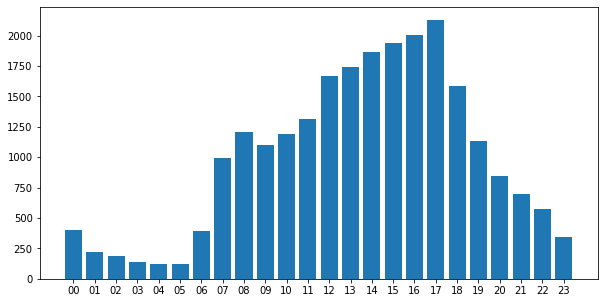

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.bar(hour_count['Hour'], hour_count['Total_Crashes'])
plt.plot()

### Hourly Fatality Rate 

In [15]:
hour_count = crash.groupby('Hour').Fatality.count()
hour_fatality = crash[crash['Fatalities'] == 'Yes'].groupby('Hour').Fatalities.count()
fat_rate = pd.concat([hour_count, hour_fatality], axis=1)
fat_rate.reset_index(inplace=True)
fat_rate.columns = ['Hour', 'Total_Crashes', 'Total_Fatality_Cases']
fat_rate['Total_Fatality_Cases'] = fat_rate['Total_Fatality_Cases'].fillna(0)
fat_rate['Fatality_Rate'] = fat_rate['Total_Fatality_Cases']/fat_rate['Total_Crashes']

In [16]:
fat_rate.to_csv('fatality_rate_per_hour.csv', index=False)

### Hourly Injury Rate

In [17]:
hour_injury = crash[crash['Injuries'] == 'Yes'].groupby('Hour').Injuries.count()
inj_rate = pd.concat([hour_count, hour_injury], axis=1)
inj_rate.reset_index(inplace=True)
inj_rate.columns = ['Hour', 'Total_Crashes', 'Total_Injury_Cases']
inj_rate['Total_Injury_Cases'] = inj_rate['Total_Injury_Cases'].fillna(0)
inj_rate['Injury_Rate'] = inj_rate['Total_Injury_Cases']/fat_rate['Total_Crashes']

In [18]:
inj_rate.to_csv('injury_rate_per_hour.csv', index=False)

### 4. Location_Description

In [19]:
crash['Location_Description'] = crash.apply(na_convert_str, column='Location_Description', axis=1)
a = crash['Location_Description'].str.lower().str.cat(sep=' ')

/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
def remove_number(text):
    text_nonum = re.sub(r'\d+', '', text)
    return text_nonum

In [21]:
a = remove_number(a)

In [22]:
from nltk.tokenize import RegexpTokenizer 
tokenizer1 = RegexpTokenizer(r'\w+')
tokens1 = tokenizer1.tokenize(a) 
# recreate token list without stopwords
from nltk.corpus import stopwords
tokens1 = [token for token in tokens1 if token not in stopwords.words('english')]
# count the word frequencies
freq_dist1 = nltk.FreqDist(tokens1)
# display and graph the word frequncies
print(freq_dist1.most_common(50)) 

[('feet', 14253), ('sr', 6799), ('rd', 6110), ('miles', 5432), ('cary', 5371), ('pva', 2956), ('p', 2376), ('us', 2365), ('v', 2264), ('st', 2252), ('hwy', 2194), ('dr', 1950), ('pkwy', 1419), ('walnut', 1335), ('farm', 1332), ('kildaire', 1306), ('maynard', 1259), ('nc', 1109), ('n', 780), ('se', 756), ('blvd', 740), ('nw', 689), ('harrison', 685), ('tryon', 644), ('chapel', 634), ('high', 579), ('av', 541), ('house', 539), ('sw', 532), ('ten', 530), ('hill', 501), ('ave', 485), ('chatham', 483), ('e', 479), ('crossroads', 467), ('r', 463), ('jones', 412), ('green', 404), ('buck', 322), ('ct', 322), ('davis', 319), ('ln', 314), ('way', 311), ('ramp', 290), ('level', 278), ('pl', 261), ('w', 258), ('church', 248), ('carpenter', 238), ('weston', 200)]


[('cary', 5371), ('walnut', 1335), ('farm', 1332), ('kildaire', 1306), ('maynard', 1259), ('harrison', 685), ('tryon', 644), ('chapel', 634), ('high', 579), ('house', 539), ('ten', 530), ('hill', 501), ('chatham', 483), ('crossroads', 467), ('jones', 412), ('green', 404), ('buck', 322), ('davis', 319), ('way', 311), ('ramp', 290), ('level', 278), ('church', 248), ('carpenter', 238), ('weston', 200), ('park', 200), ('ne', 192), ('old', 176), ('parkway', 166), ('holly', 166), ('springs', 162), ('creek', 160), ('near', 158), ('regency', 156), ('towne', 149), ('morrisville', 144), ('mccrimmon', 128), ('sb', 125), ('apex', 121), ('lake', 121), ('okelly', 118), ('new', 114), ('village', 112), ('exit', 110), ('waverly', 106), ('cir', 105), ('caitboo', 101), ('west', 100), ('franklin', 100), ('nb', 96), ('south', 89)]


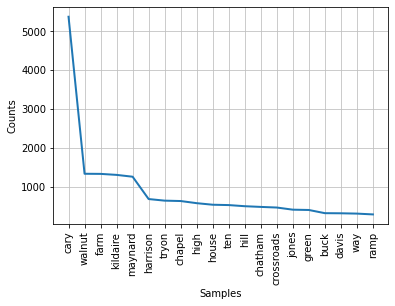

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
remove_words = ['feet', 'sr', 'rd', 'miles', 'pva','p.v.a', 'p', 'us', 'rd', 'v', 'st', 'hwy', 'dr', 'pkwy', 'nc', 'n', 'se', 'blvd', 'nw', 'av', 'sw', 'ave', 'e', 'r', 'ct', 'ln', 'pl', 'w', 'from']
tokens1 = [token for token in tokens1 if token not in remove_words]
# count the word frequencies
freq_dist1 = nltk.FreqDist(tokens1)
# display and graph the word frequncies
print(freq_dist1.most_common(50)) 
freq_dist1.plot(20)

In [24]:
examples = ['CARY', 'WALNUT', 'KILDAIRE', 'MAYNARD', 'HARRISON', 'TYRON', 'CHAPEL', 'HOUSE', 'CHATHAM']
for example in examples:
    print(crash[crash['Location_Description'].str.contains(example)].Location_Description.iloc[1])

.1 MILES FROM CARY PARKWAY
.1 MILES FROM P.V.A. (1830 WALNUT ST)
60 FEET FROM SR 1300 (KILDAIRE FARM RD)
70 FEET FROM PVA 760 SW MAYNARD RD
200 FEET FROM SR 1652 (N HARRISON AV)
00 FEET FROM SR 1009 (TYRON RD)
75 FEET FROM SR3081 (CHAPEL HILL RD)
360 FEET FROM SR 1615 (HIGH HOUSE RD)
30 FEET FROM SR 1011 (W CHATHAM ST)


### 5. Vehicle - Weather

In [25]:
crash['Vehicle1'] = crash.apply(na_convert_str, column='Vehicle1', axis=1)
crash['Vehicle2'] = crash.apply(na_convert_str, column='Vehicle2', axis=1)
crash['Vehicle3'] = crash.apply(na_convert_str, column='Vehicle3', axis=1)
crash['Vehicle4'] = crash.apply(na_convert_str, column='Vehicle4', axis=1)
crash['Weather'] = crash.apply(na_convert_str, column='Weather', axis=1)

/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [26]:
vehicles = crash[['Vehicle1','Vehicle2','Vehicle3','Vehicle4']]
vehicles = pd.melt(vehicles, value_vars=['Vehicle1','Vehicle2','Vehicle3','Vehicle4'])
vehicles.rename({'value':'Vehicle'}, axis=1, inplace=True)

In [27]:
truck_list = ['']
def vehicle_convert(s):
    x = s['Vehicle']
    if 'TRUCK' in x:
        return 'TRUCK'
    elif 'BUS' in x:
        return 'BUS'
    else:
        return x

In [28]:
vehicle_weather = crash[['Weather','Vehicle1','Vehicle2','Vehicle3','Vehicle4']]
vehicle_weather = pd.melt(vehicle_weather, id_vars=['Weather'], value_vars=['Vehicle1','Vehicle2','Vehicle3','Vehicle4'])
vehicle_weather = vehicle_weather.iloc[:,[0,2]]
vehicle_weather.rename({'value':'Vehicle'}, axis=1, inplace=True)
vehicle_weather['New_Vehicle'] = vehicles.apply(vehicle_convert, axis=1)

In [29]:
vehicle_weather['New_Vehicle'].value_counts()

NONE                                    51556
PASSENGER CAR                           26385
SPORT UTILITY                           10573
PICKUP                                   3831
VAN                                      2217
TRUCK                                     882
POLICE                                     40
MOPED                                      25
EMS VEHICLE- AMBULANCE- RESCUE SQUAD       18
MOTOR HOME/RECREATIONAL VEHICLE            14
BUS                                        13
TAXICAB                                     6
TRACTOR/SEMI-TRAILER                        5
AUTOCYCLE                                   1
ALL TERRAIN VEHICLE (ATV)                   1
FARM EQUIPMENT                              1
Name: New_Vehicle, dtype: int64

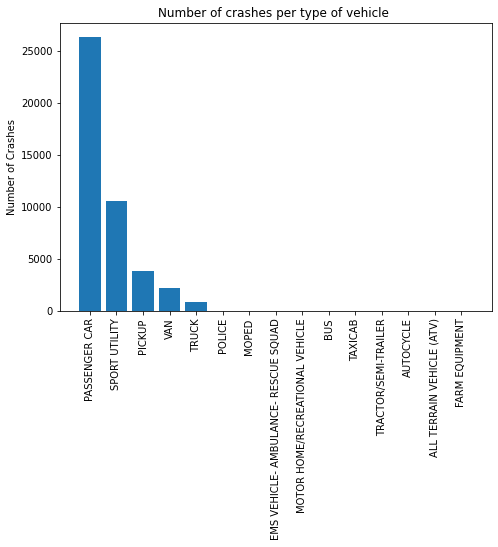

In [30]:
vehicle_counts = vehicle_weather['New_Vehicle'].value_counts()
vehicle_counts = pd.DataFrame(vehicle_counts)
vehicle_counts.reset_index(inplace=True)
vehicle_counts.columns = ['Vehicle', 'Number_of_Crashes']
vehicle_counts = vehicle_counts[vehicle_counts['Vehicle'] != 'NONE']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(vehicle_counts['Vehicle'], vehicle_counts['Number_of_Crashes'])
ax.set_ylabel('Number of Crashes')
ax.set_title('Number of crashes per type of vehicle ')
plt.xticks(rotation = 90)
plt.show()

In [31]:
# convert types of weather into only 2 types: GOOD and BAD
def weather_convert(s):
    if s == 'CLEAR':
        return 'GOOD'
    elif s == 'NONE':
        return s
    else:
        return 'BAD'

In [32]:
vehicle_weather['Weather_2types'] = vehicle_weather['Weather'].apply(weather_convert)

In [33]:
vehicle_weather.to_csv('vehicle_weather.csv', index=False)

## 6. Road_Configuration & Light_Condition

In [34]:
# investigate about the factor 'DARTING'
crash['Light_Condition'] = crash.apply(na_convert_str, column='Light_Condition', axis=1)
crash['Road_Configuration'] = crash.apply(na_convert_str, column='Road_Configuration', axis=1)

/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/uyenhuynh/.venv/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 7. Export the cleaned dataset 

In [35]:
crash.to_csv('data_clean.csv', index=False, sep=';')